In [60]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

I'll be using a popular image dataset for faces called the CelebFaces dataset.  I've provided some helper functions which you can find on the resources page, which will just help us with manipulating images and loading this dataset.

In [61]:
from libs import utils
# utils.<tab>
files = utils.get_celeb_files()
files

['img_align_celeba/000073.jpg',
 'img_align_celeba/000007.jpg',
 'img_align_celeba/000003.jpg',
 'img_align_celeba/000090.jpg',
 'img_align_celeba/000089.jpg',
 'img_align_celeba/000096.jpg',
 'img_align_celeba/000013.jpg',
 'img_align_celeba/000006.jpg',
 'img_align_celeba/000042.jpg',
 'img_align_celeba/000056.jpg',
 'img_align_celeba/000044.jpg',
 'img_align_celeba/000047.jpg',
 'img_align_celeba/000072.jpg',
 'img_align_celeba/000100.jpg',
 'img_align_celeba/000094.jpg',
 'img_align_celeba/000076.jpg',
 'img_align_celeba/000079.jpg',
 'img_align_celeba/000012.jpg',
 'img_align_celeba/000060.jpg',
 'img_align_celeba/000045.jpg',
 'img_align_celeba/000046.jpg',
 'img_align_celeba/000088.jpg',
 'img_align_celeba/000025.jpg',
 'img_align_celeba/000092.jpg',
 'img_align_celeba/000019.jpg',
 'img_align_celeba/000074.jpg',
 'img_align_celeba/000067.jpg',
 'img_align_celeba/000078.jpg',
 'img_align_celeba/000077.jpg',
 'img_align_celeba/000051.jpg',
 'img_align_celeba/000034.jpg',
 'img_al

Let's get the 50th image in this list of files, and then read the file at that location as an image, setting the result to a variable, `img`, and inspect a bit further what's going on:

In [62]:
img = plt.imread(files[50])
# img.<tab>
print(img)

[[[220 209 205]
  [219 208 204]
  [218 207 203]
  ..., 
  [148 161 152]
  [148 161 152]
  [148 161 152]]

 [[220 209 205]
  [219 208 204]
  [218 207 203]
  ..., 
  [148 161 152]
  [148 161 152]
  [148 161 152]]

 [[220 209 205]
  [219 208 204]
  [218 207 203]
  ..., 
  [148 161 152]
  [148 161 152]
  [148 161 152]]

 ..., 
 [[244 162 150]
  [234 151 137]
  [230 138 125]
  ..., 
  [248 224 180]
  [248 225 181]
  [248 225 181]]

 [[243 156 139]
  [238 149 131]
  [234 137 121]
  ..., 
  [248 224 180]
  [247 224 180]
  [247 224 180]]

 [[244 156 136]
  [241 148 130]
  [236 137 118]
  ..., 
  [248 224 180]
  [247 224 180]
  [247 224 180]]]


When I print out this image, I can see all the numbers that represent this image.  We can use the function `imshow` to see this:

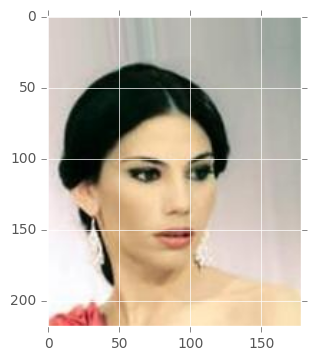

In [63]:
# If nothing is drawn and you are using notebook, try uncommenting the next line:
#%matplotlib inline
plt.imshow(img)

<a name="understanding-image-shapes"></a>
## Understanding Image Shapes

Let's break this data down a bit more.  We can see the dimensions of the data using the `shape` accessor:

In [64]:
img.shape
# (218, 178, 3)

(218, 178, 3)

This means that the image has 218 rows, 178 columns, and 3 color channels corresponding to the Red, Green, and Blue channels of the image, or RGB.  Let's try looking at just one of the color channels.

# Session 1: Introduction to Tensorflow
<p class='lead'>
Creative Applications of Deep Learning with Tensorflow<br />
Parag K. Mital<br />
Kadenze, Inc.<br />
</p>

<a name="learning-goals"></a>
# Learning Goals

* Learn the basic idea behind machine learning: learning from data and discovering representations
* Learn how to preprocess a dataset using its mean and standard deviation
* Learn the basic components of a Tensorflow Graph

# Table of Contents
<!-- MarkdownTOC autolink=true autoanchor=true bracket=round -->

- [Introduction](#introduction)
    - [Promo](#promo)
    - [Session Overview](#session-overview)
- [Learning From Data](#learning-from-data)
    - [Deep Learning vs. Machine Learning](#deep-learning-vs-machine-learning)
    - [Invariances](#invariances)
    - [Scope of Learning](#scope-of-learning)
    - [Existing datasets](#existing-datasets)
- [Preprocessing Data](#preprocessing-data)
    - [Understanding Image Shapes](#understanding-image-shapes)
    - [The Batch Dimension](#the-batch-dimension)
    - [Mean/Deviation of Images](#meandeviation-of-images)
    - [Dataset Preprocessing](#dataset-preprocessing)
    - [Histograms](#histograms)
    - [Histogram Equalization](#histogram-equalization)
- [Tensorflow Basics](#tensorflow-basics)
    - [Variables](#variables)
    - [Tensors](#tensors)
    - [Graphs](#graphs)
    - [Operations](#operations)
    - [Tensor](#tensor)
    - [Sessions](#sessions)
    - [Tensor Shapes](#tensor-shapes)
    - [Many Operations](#many-operations)
- [Convolution](#convolution)
    - [Creating a 2-D Gaussian Kernel](#creating-a-2-d-gaussian-kernel)
    - [Convolving an Image with a Gaussian](#convolving-an-image-with-a-gaussian)
    - [Convolve/Filter an image using a Gaussian Kernel](#convolvefilter-an-image-using-a-gaussian-kernel)
    - [Modulating the Gaussian with a Sine Wave to create Gabor Kernel](#modulating-the-gaussian-with-a-sine-wave-to-create-gabor-kernel)
    - [Manipulating an image with this Gabor](#manipulating-an-image-with-this-gabor)
- [Homework](#homework)
- [Next Session](#next-session)
- [Reading Material](#reading-material)

<!-- /MarkdownTOC -->

<a name="introduction"></a>
# Introduction

This course introduces you to deep learning: the state-of-the-art approach to building artificial intelligence algorithms.  We cover the basic components of deep learning, what it means, how it works, and develop code necessary to build various algorithms such as deep convolutional networks, variational autoencoders, generative adversarial networks, and recurrent neural networks.  A major focus of this course will be to not only understand how to build the necessary components of these algorithms, but also how to apply them for exploring creative applications.  We'll see how to train a computer to recognize objects in an image and use this knowledge to drive new and interesting behaviors, from understanding the similarities and differences in large datasets and using them to self-organize, to understanding how to infinitely generate entirely new content or match the aesthetics or contents of another image.  Deep learning offers enormous potential for creative applications and in this course we interrogate what's possible.  Through practical applications and guided homework assignments, you'll be expected to create datasets, develop and train neural networks, explore your own media collections using existing state-of-the-art deep nets, synthesize new content from generative algorithms, and understand deep learning's potential for creating entirely new aesthetics and new ways of interacting with large amounts of data.​​

<a name="promo"></a>
## Promo

Deep learning has emerged at the forefront of nearly every major computational breakthrough in the last 4 years.  It is no wonder that it is already in many of the products we use today, from netflix or amazon's personalized recommendations; to the filters that block our spam; to ways that we interact with personal assistants like Apple's Siri or Microsoft Cortana, even to the very ways our personal health is monitored.  And sure deep learning algorithms are capable of some amazing things.  But it's not just science applications that are benefiting from this research.

Artists too are starting to explore how Deep Learning can be used in their own practice.  Photographers are starting to explore different ways of exploring visual media.  Generative artists are writing algorithms to create entirely new aesthetics. Filmmakers are exploring virtual worlds ripe with potential for procedural content.

In this course, we're going straight to the state of the art.  And we're going to learn it all.  We'll see how to make an algorithm paint an image, or hallucinate objects in a photograph.  We'll see how to train a computer to recognize objects in an image and use this knowledge to drive new and interesting behaviors, from understanding the similarities and differences in large datasets to using them to self organize, to understanding how to infinitely generate entirely new content or match the aesthetics or contents of other images.  We'll even see how to teach a computer to read and synthesize new phrases.

But we won't just be using other peoples code to do all of this.  We're going to develop everything ourselves using Tensorflow and I'm going to show you how to do it.  This course isn't just for artists nor is it just for programmers.  It's for people that want to learn more about how to apply deep learning with a hands on approach, straight into the python console, and learn what it all means through creative thinking and interaction.

I'm Parag Mital, artist, researcher and Director of Machine Intelligence at Kadenze.  For the last 10 years, I've been exploring creative uses of computational models making use of machine and deep learning, film datasets, eye-tracking, EEG, and fMRI recordings exploring applications such as generative film experiences, augmented reality hallucinations, and expressive control of large audiovisual corpora.

But this course isn't just about me.  It's about bringing all of you together.  It's about bringing together different backgrounds, different practices, and sticking all of you in the same virtual room, giving you access to state of the art methods in deep learning, some really amazing stuff, and then letting you go wild on the Kadenze platform.  We've been working very hard to build a platform for learning that rivals anything else out there for learning this stuff.

You'll be able to share your content, upload videos, comment and exchange code and ideas, all led by the course I've developed for us.  But before we get there we're going to have to cover a lot of groundwork.  The basics that we'll use to develop state of the art algorithms in deep learning.  And that's really so we can better interrogate what's possible, ask the bigger questions, and be able to explore just where all this is heading in more depth.  With all of that in mind, Let's get started>

Join me as we learn all about Creative Applications of Deep Learning with Tensorflow.

<a name="session-overview"></a>
## Session Overview

We're first going to talk about Deep Learning, what it is, and how it relates to other branches of learning.  We'll then talk about the major components of Deep Learning, the importance of datasets, and the nature of representation, which is at the heart of deep learning.

If you've never used Python before, we'll be jumping straight into using libraries like numpy, matplotlib, and scipy. Before starting this session, please check the resources section for a notebook introducing some fundamentals of python programming.  When you feel comfortable with loading images from a directory, resizing, cropping, how to change an image datatype from unsigned int to float32, and what the range of each data type should be, then come back here and pick up where you left off.  We'll then get our hands dirty with Tensorflow, Google's library for machine intelligence.  We'll learn the basic components of creating a computational graph with Tensorflow, including how to convolve an image to detect interesting features at different scales.  This groundwork will finally lead us towards automatically learning our handcrafted features/algorithms.

<a name="learning-from-data"></a>
# Learning From Data

<a name="deep-learning-vs-machine-learning"></a>
## Deep Learning vs. Machine Learning

So what is this word I keep using, Deep Learning.  And how is it different to Machine Learning?  Well Deep Learning is a *type* of Machine Learning algorithm that uses Neural Networks to learn.  The type of learning is "Deep" because it is composed of many layers of Neural Networks.  In this course we're really going to focus on supervised and unsupervised Deep Learning.  But there are many other incredibly valuable branches of Machine Learning such as Reinforcement Learning, Dictionary Learning, Probabilistic Graphical Models and Bayesian Methods (Bishop), or Genetic and Evolutionary Algorithms.  And any of these branches could certainly even be combined with each other or with Deep Networks as well.  We won't really be able to get into these other branches of learning in this course.  Instead, we'll focus more on building "networks", short for neural networks, and how they can do some really amazing things.  Before we can get into all that, we're going to need to understand a bit more about data and its importance in deep learning.

<a name="invariances"></a>
## Invariances

Deep Learning requires data.  A lot of it.  It's really one of the major reasons as to why Deep Learning has been so successful.  Having many examples of the thing we are trying to learn is the first thing you'll need before even thinking about Deep Learning.  Often, it is the biggest blocker to learning about something in the world.  Even as a child, we need a lot of experience with something before we begin to understand it.  I find I spend most of my time just finding the right data for a network to learn.  Getting it from various sources, making sure it all looks right and is labeled.  That is a lot of work.  The rest of it is easy as we'll see by the end of this course.

Let's say we would like build a network that is capable of looking at an image and saying what object is in the image.  There are so many possible ways that an object could be manifested in an image.  It's rare to ever see just a single object in isolation. In order to teach a computer about an object, we would have to be able to give it an image of an object in every possible way that it could exist.

We generally call these ways of existing "invariances".  That just means we are trying not to vary based on some factor.  We are invariant to it.  For instance, an object could appear to one side of an image, or another.  We call that translation invariance.  Or it could be from one angle or another.  That's called rotation invariance.  Or it could be closer to the camera, or farther.  and That would be scale invariance.  There are plenty of other types of invariances, such as perspective or brightness or exposure to give a few more examples for photographic images.

<a name="scope-of-learning"></a>
## Scope of Learning

With Deep Learning, you will always need a dataset that will teach the algorithm about the world.  But you aren't really teaching it everything.  You are only teaching it what is in your dataset!  That is a very important distinction.  If I show my algorithm only faces of people which are always placed in the center of an image, it will not be able to understand anything about faces that are not in the center of the image!  Well at least that's mostly true.

That's not to say that a network is incapable of transfering what it has learned to learn new concepts more easily.  Or to learn things that might be necessary for it to learn other representations.  For instance, a network that has been trained to learn about birds, probably knows a good bit about trees, branches, and other bird-like hangouts, depending on the dataset.  But, in general, we are limited to learning what our dataset has access to.

So if you're thinking about creating a dataset, you're going to have to think about what it is that you want to teach your network.  What sort of images will it see?  What representations do you think your network could learn given the data you've shown it?

One of the major contributions to the success of Deep Learning algorithms is the amount of data out there.  Datasets have grown from orders of hundreds to thousands to many millions.   The more data you have, the more capable your network will be at determining whatever its objective is.

<a name="existing-datasets"></a>
## Existing datasets

With that in mind, let's try to find a dataset that we can work with.  There are a ton of datasets out there that current machine learning researchers use.  For instance if I do a quick Google search for Deep Learning Datasets, i can see for instance a link on deeplearning.net, listing a few interesting ones e.g. http://deeplearning.net/datasets/, including MNIST, CalTech, CelebNet, LFW, CIFAR, MS Coco, Illustration2Vec, and there are ton more.  And these are primarily image based.  But if you are interested in finding more, just do a quick search or drop a quick message on the forums if you're looking for something in particular.

* MNIST
* CalTech
* CelebNet
* ImageNet: http://www.image-net.org/
* LFW
* CIFAR10
* CIFAR100
* MS Coco: http://mscoco.org/home/
* WLFDB: http://wlfdb.stevenhoi.com/
* Flickr 8k: http://nlp.cs.illinois.edu/HockenmaierGroup/Framing_Image_Description/KCCA.html
* Flickr 30k

<a name="preprocessing-data"></a>
# Preprocessing Data

In this section, we're going to learn a bit about working with an image based dataset.  We'll see how image dimensions are formatted as a single image and how they're represented as a collection using a 4-d array.  We'll then look at how we can perform dataset normalization.  If you're comfortable with all of this, please feel free to skip to the next video.

We're first going to load some libraries that we'll be making use of.

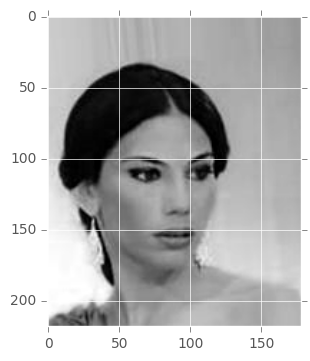

In [65]:
plt.imshow(img[:, :, 0], cmap='gray')
plt.imshow(img[:, :, 1], cmap='gray')
plt.imshow(img[:, :, 2], cmap='gray')

We use the special colon operator to say take every value in this dimension.  This is saying, give me every row, every column, and the 0th dimension of the color channels.  What we're seeing is the amount of Red, Green, or Blue contributing to the overall color image.

Let's use another helper function which will load every image file in the celeb dataset rather than just give us the filenames like before.  By default, this will just return the first 1000 images because loading the entire dataset is a bit cumbersome.  In one of the later sessions, I'll show you how tensorflow can handle loading images using a pipeline so we can load this same dataset.  For now, let's stick with this:

In [66]:
imgs = utils.get_celeb_imgs()

We now have a list containing our images.  Each index of the `imgs` list is another image which we can access using the square brackets:

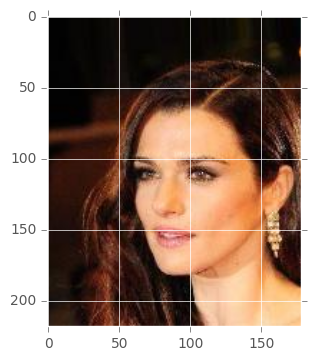

In [67]:
plt.imshow(imgs[0])

<a name="the-batch-dimension"></a>
## The Batch Dimension

Remember that an image has a shape describing the height, width, channels:

In [15]:
imgs[0].shape

(218, 178, 3)

It turns out we'll often use another convention for storing many images in an array using a new dimension called the batch dimension.  The resulting image shape will be exactly the same, except we'll stick on a new dimension on the beginning... giving us number of images x the height x the width x the number of color channels.

N x H x W x C

A Color image should have 3 color channels, RGB.

We can combine all of our images to have these 4 dimensions by telling numpy to give us an array of all the images.

In [68]:
data = np.array(imgs)
data.shape

(100, 218, 178, 3)

This will only work if every image in our list is exactly the same size.  So if you have a wide image, short image, long image, forget about it.  You'll need them all to be the same size.  If you are unsure of how to get all of your images into the same size, then please please refer to the online resources for the notebook I've provided which shows you exactly how to take a bunch of images of different sizes, and crop and resize them the best we can to make them all the same size.

<a name="meandeviation-of-images"></a>
## Mean/Deviation of Images

Now that we have our data in a single numpy variable, we can do alot of cool stuff.  Let's look at the mean of the batch channel:

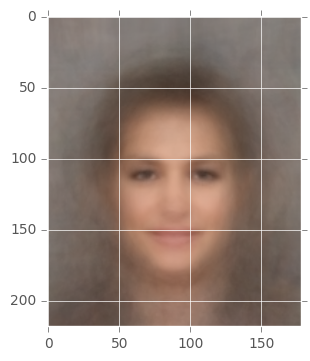

In [69]:
mean_img = np.mean(data, axis=0)
plt.imshow(mean_img.astype(np.uint8))

This is the first step towards building our robot overlords.  We've reduced down our entire dataset to a single representation which describes what most of our dataset looks like.  There is one other very useful statistic which we can look at very easily:

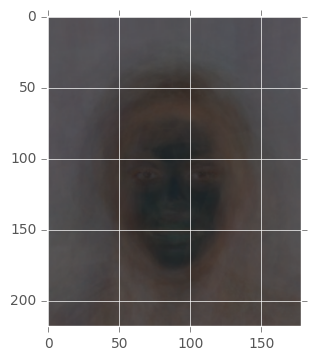

In [70]:
std_img = np.std(data, axis=0)
plt.imshow(std_img.astype(np.uint8))

So this is incredibly cool.  We've just shown where changes are likely to be in our dataset of images.  Or put another way, we're showing where and how much variance there is in our previous mean image representation.

We're looking at this per color channel.  So we'll see variance for each color channel represented separately, and then combined as a color image.  We can try to look at the average variance over all color channels by taking their mean:

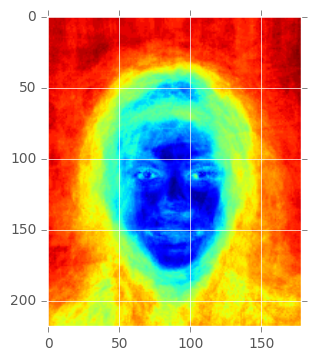

In [71]:
plt.imshow(np.mean(std_img, axis=2).astype(np.uint8))

This is showing us on average, how every color channel will vary as a heatmap.  The more red, the more likely that our mean image is not the best representation.  The more blue, the less likely that our mean image is far off from any other possible image.

<a name="dataset-preprocessing"></a>
## Dataset Preprocessing

Think back to when I described what we're trying to accomplish when we build a model for machine learning?  We're trying to build a model that understands invariances.  We need our model to be able to express *all* of the things that can possibly change in our data.  Well, this is the first step in understanding what can change.  If we are looking to use deep learning to learn something complex about our data, it will often start by modeling both the mean and standard deviation of our dataset.  We can help speed things up by "preprocessing" our dataset by removing the mean and standard deviation.  What does this mean?  Subtracting the mean, and dividing by the standard deviation.  Another word for that is "normalization".

<a name="histograms"></a>
## Histograms

Let's have a look at our dataset another way to see why this might be a useful thing to do.  We're first going to convert our `batch` x `height` x `width` x `channels` array into a 1 dimensional array.  Instead of having 4 dimensions, we'll now just have 1 dimension of every pixel value stretched out in a long vector, or 1 dimensional array.

In [72]:
flattened = data.ravel()
print(data[:1])
print(flattened[:10])

[[[[  2   2   2]
   [  2   2   2]
   [  2   2   2]
   ..., 
   [  3   7   8]
   [  1   7   7]
   [  1   7   5]]

  [[  2   2   2]
   [  2   2   2]
   [  2   2   2]
   ..., 
   [  3   7   8]
   [  1   7   7]
   [  1   7   5]]

  [[  2   2   2]
   [  2   2   2]
   [  2   2   2]
   ..., 
   [  3   7   8]
   [  1   7   7]
   [  0   8   5]]

  ..., 
  [[ 38  25  19]
   [ 41  28  20]
   [ 45  30  23]
   ..., 
   [253 199 139]
   [253 197 140]
   [253 197 140]]

  [[ 36  23  17]
   [ 42  29  21]
   [ 48  33  26]
   ..., 
   [255 201 141]
   [255 203 149]
   [255 204 151]]

  [[ 36  23  17]
   [ 42  29  21]
   [ 48  33  26]
   ..., 
   [255 204 144]
   [255 206 153]
   [255 206 155]]]]
[2 2 2 2 2 2 2 2 2 2]


We first convert our N x H x W x C dimensional array into a 1 dimensional array.  The values of this array will be based on the last dimensions order.  So we'll have: [<font color='red'>251</font>, <font color='green'>238</font>, <font color='blue'>205</font>, <font color='red'>251</font>, <font color='green'>238</font>, <font color='blue'>206</font>, <font color='red'>253</font>, <font color='green'>240</font>, <font color='blue'>207</font>, ...]

We can visualize what the "distribution", or range and frequency of possible values are.  This is a very useful thing to know.  It tells us whether our data is predictable or not.

(array([ 215683.,  118606.,   99471.,   71712.,   66626.,   61991.,
          62341.,   58347.,   56752.,   56250.,   56680.,   58598.,
          62867.,   60671.,   59112.,   59377.,   62375.,   63608.,
          62202.,   64642.,   63383.,   62096.,   61002.,   60649.,
          60699.,   60159.,   59116.,   59356.,   60410.,   64301.,
          67406.,   61663.,   59823.,   60528.,   62080.,   62145.,
          62885.,   62685.,   62504.,   62364.,   59522.,   58812.,
          57883.,   61380.,   63337.,   57662.,   57147.,   56385.,
          56111.,   58100.,   56285.,   55019.,   54652.,   52441.,
          50963.,   48996.,   47700.,   45935.,   45386.,   43596.,
          42975.,   42894.,   42317.,   42217.,   42185.,   42588.,
          43190.,   43020.,   43251.,   43271.,   43194.,   43061.,
          42159.,   42320.,   41874.,   41863.,   42906.,   42433.,
          42506.,   42391.,   42675.,   42548.,   42545.,   42574.,
          42698.,   42118.,   42144.,   41540., 

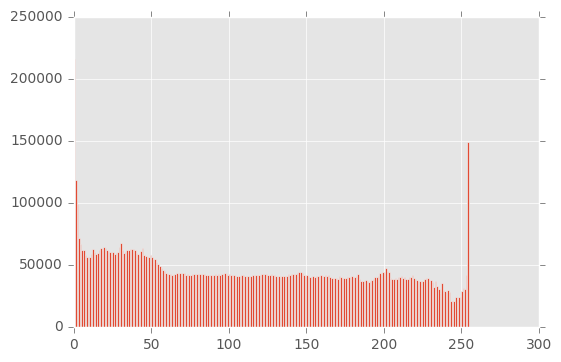

In [73]:
plt.hist(flattened.ravel(), 255)

The last line is saying give me a histogram of every value in the vector, and use 255 bins.  Each bin is grouping a range of values.  The bars of each bin describe the frequency, or how many times anything within that range of values appears.In other words, it is telling us if there is something that seems to happen more than anything else.  If there is, it is likely that a neural network will take advantage of that.


<a name="histogram-equalization"></a>
## Histogram Equalization

The mean of our dataset looks like this:

(array([    2.,     0.,     0.,     0.,     0.,     9.,    25.,    29.,
           32.,    44.,    46.,    39.,    48.,    58.,    30.,    39.,
           63.,    50.,    65.,    63.,    74.,    78.,    89.,   111.,
          101.,   121.,   103.,   116.,    99.,   155.,   173.,   210.,
          231.,   212.,   286.,   305.,   326.,   352.,   333.,   382.,
          399.,   383.,   388.,   454.,   531.,   569.,   655.,   662.,
          720.,   791.,   838.,   851.,   897.,   935.,   863.,   850.,
          815.,   821.,   818.,   849.,   932.,   849.,   855.,   836.,
          897.,   884.,   858.,   837.,   917.,   922.,   918.,   924.,
          936.,   964.,  1009.,  1054.,  1082.,  1113.,  1163.,  1119.,
         1124.,  1096.,  1094.,  1089.,  1086.,  1110.,  1072.,  1111.,
         1135.,  1186.,  1131.,  1204.,  1171.,  1180.,  1237.,  1235.,
         1171.,  1217.,  1174.,  1167.,  1244.,  1314.,  1353.,  1483.,
         1485.,  1555.,  1594.,  1487.,  1516.,  1482.,  1501., 

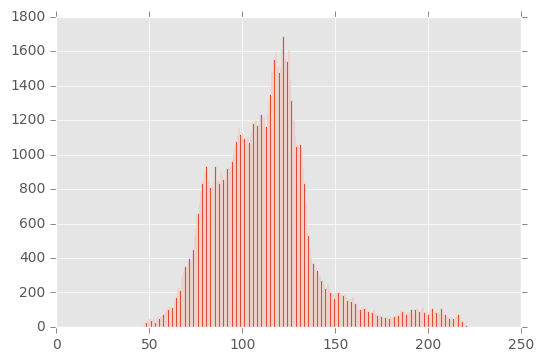

In [74]:
plt.hist(mean_img.ravel(), 255)

When we subtract an image by our mean image, we remove all of this information from it.  And that means that the rest of the information is really what is important for describing what is unique about it.

Let's try and compare the histogram before and after "normalizing our data":

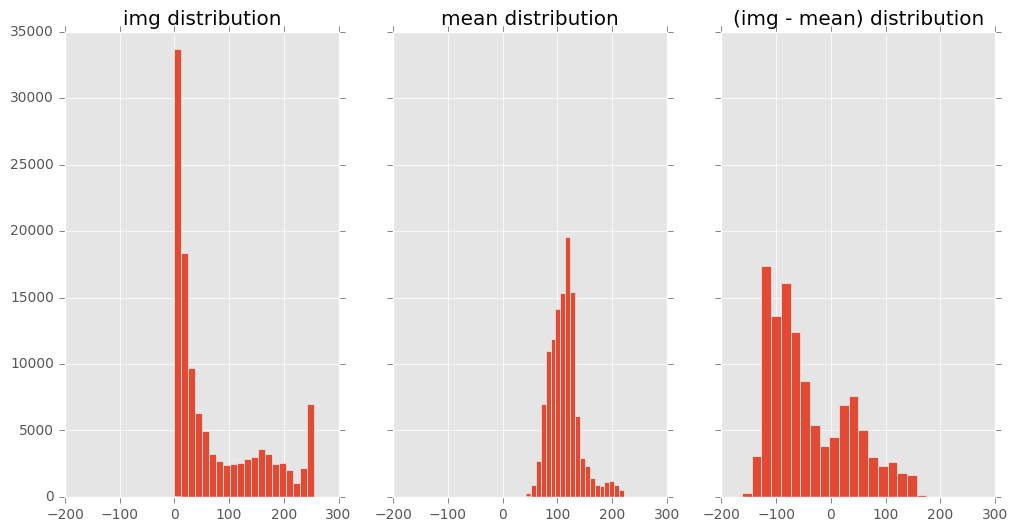

In [75]:
bins = 20
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0]).ravel(), bins)
axs[0].set_title('img distribution')
axs[1].hist((mean_img).ravel(), bins)
axs[1].set_title('mean distribution')
axs[2].hist((data[0] - mean_img).ravel(), bins)
axs[2].set_title('(img - mean) distribution')

What we can see from the histograms is the original image's distribution of values from 0 - 255.  The mean image's data distribution is mostly centered around the value 100.  When we look at the difference of the original image and the mean image as a histogram, we can see that the distribution is now centered around 0.  What we are seeing is the distribution of values that were above the mean image's intensity, and which were below it.  Let's take it one step further and complete the normalization by dividing by the standard deviation of our dataset:

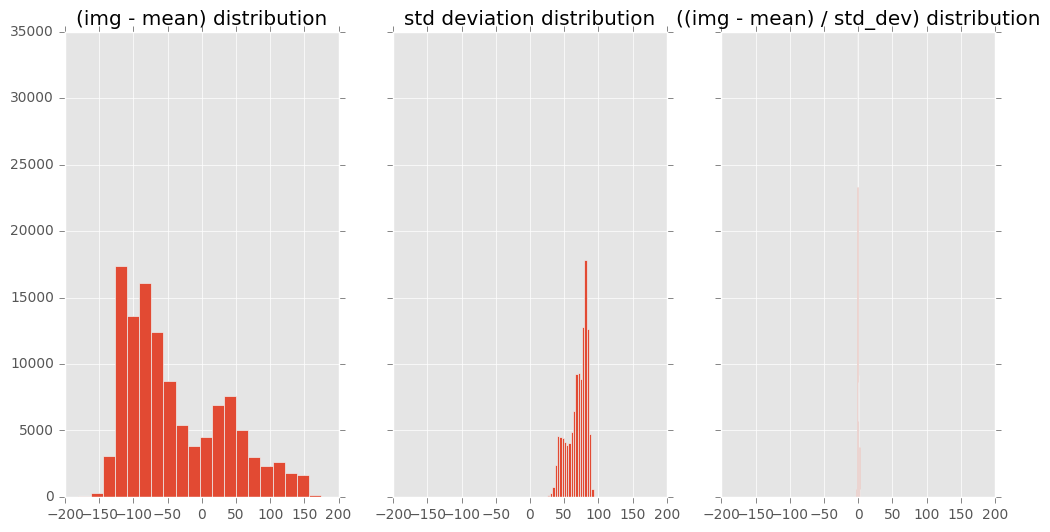

In [76]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0] - mean_img).ravel(), bins)
axs[0].set_title('(img - mean) distribution')
axs[1].hist((std_img).ravel(), bins)
axs[1].set_title('std deviation distribution')
axs[2].hist(((data[0] - mean_img) / std_img).ravel(), bins)
axs[2].set_title('((img - mean) / std_dev) distribution')

Now our data has been squished into a peak!  We'll have to look at it on a different scale to see what's going on:

In [77]:
axs[2].set_xlim([-150, 150])
axs[2].set_xlim([-100, 100])
axs[2].set_xlim([-50, 50])
axs[2].set_xlim([-10, 10])
axs[2].set_xlim([-5, 5])

(-5, 5)

What we can see is that the data is in the range of -3 to 3, with the bulk of the data centered around -1 to 1.  This is the effect of normalizing our data: most of the data will be around 0, where some deviations of it will follow between -3 to 3.

If our data does not end up looking like this, then we should either (1): get much more data to calculate our mean/std deviation, or (2): either try another method of normalization, such as scaling the values between 0 to 1, or -1 to 1, or possibly not bother with normalization at all.  There are other options that one could explore, including different types of normalization such as local contrast normalization for images or PCA based normalization but we won't have time to get into those in this course.

<a name="tensorflow-basics"></a>
# Tensorflow Basics

Let's now switch gears and start working with Google's Library for Numerical Computation, TensorFlow.  This library can do most of the things we've done so far.  However, it has a very different approach for doing so.  And it can do a whole lot more cool stuff which we'll eventually get into.  The major difference to take away from the remainder of this session is that instead of computing things immediately, we first define things that we want to compute later using what's called a `Graph`.  Everything in Tensorflow takes place in a computational graph and running and evaluating anything in the graph requires a `Session`.  Let's take a look at how these both work and then we'll get into the benefits of why this is useful:

<a name="variables"></a>
## Variables

We're first going to import the tensorflow library:

In [78]:
import tensorflow as tf

Let's take a look at how we might create a range of numbers.  Using numpy, we could for instance use the linear space function:

In [79]:
x = np.linspace(-3.0, 3.0, 100)

# Immediately, the result is given to us.  An array of 100 numbers equally spaced from -3.0 to 3.0.
print(x)

# We know from numpy arrays that they have a `shape`, in this case a 1-dimensional array of 100 values
print(x.shape)

# and a `dtype`, in this case float64, or 64 bit floating point values.
print(x.dtype)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

<a name="tensors"></a>
## Tensors

In tensorflow, we could try to do the same thing using their linear space function:

In [80]:
x = tf.linspace(-3.0, 3.0, 100)
print(x)

Tensor("LinSpace_3:0", shape=(100,), dtype=float32)


Instead of a `numpy.array`, we are returned a `tf.Tensor`.  The name of it is "LinSpace:0".  Wherever we see this colon 0, that just means the output of.  So the name of this Tensor is saying, the output of LinSpace.

Think of `tf.Tensor`s the same way as you would the `numpy.array`.  It is described by its `shape`, in this case, only 1 dimension of 100 values.  And it has a `dtype`, in this case, `float32`.  But *unlike* the `numpy.array`, there are no values printed here!  That's because it actually hasn't computed its values yet.  Instead, it just refers to the output of a `tf.Operation` which has been already been added to Tensorflow's default computational graph.  The result of that operation is the tensor that we are returned.

<a name="graphs"></a>
## Graphs

Let's try and inspect the underlying graph.  We can request the "default" graph where all of our operations have been added:

In [81]:
g = tf.get_default_graph()

<a name="operations"></a>
## Operations

And from this graph, we can get a list of all the operations that have been added, and print out their names:

In [82]:
[op.name for op in g.get_operations()]

['LinSpace/start',
 'LinSpace/stop',
 'LinSpace/num',
 'LinSpace',
 'sub/y',
 'sub',
 'Pow/y',
 'Pow',
 'Pow_1/x',
 'Pow_1/y',
 'Pow_1',
 'mul/x',
 'mul',
 'truediv',
 'Neg',
 'Exp',
 'Sqrt/x',
 'Sqrt',
 'mul_1/x',
 'mul_1',
 'truediv_1/x',
 'truediv_1',
 'mul_2',
 'Reshape/shape',
 'Reshape',
 'Reshape_1/shape',
 'Reshape_1',
 'MatMul',
 'Reshape_2/tensor',
 'Reshape_2/shape',
 'Reshape_2',
 'Reshape_3/shape',
 'Reshape_3',
 'Conv2D',
 'Conv2D_1',
 'Conv2D_2',
 'Reshape_4/shape',
 'Reshape_4',
 'Reshape_5/shape',
 'Reshape_5',
 'Conv2D_3',
 'Reshape_6/shape',
 'Reshape_6',
 'Conv2D_4',
 'Reshape_7/tensor',
 'Reshape_7/shape',
 'Reshape_7',
 'Reshape_8/shape',
 'Reshape_8',
 'LinSpace_1/start',
 'LinSpace_1/stop',
 'LinSpace_1/num',
 'LinSpace_1',
 'Sin',
 'Reshape_9/shape',
 'Reshape_9',
 'ones',
 'MatMul_1',
 'Mul',
 'img',
 'ExpandDims/dim',
 'ExpandDims',
 'ExpandDims_1/dim',
 'ExpandDims_1',
 'mean',
 'sigma',
 'ksize',
 'LinSpace_2/start',
 'LinSpace_2/stop',
 'LinSpace_2',
 'sub

So Tensorflow has named each of our operations to generally reflect what they are doing.  There are a few parameters that are all prefixed by LinSpace, and then the last one which is the operation which takes all of the parameters and creates an output for the linspace.

<a name="tensor"></a>
## Tensor

We can request the output of any operation, which is a tensor, by asking the graph for the tensor's name:

In [83]:
g.get_tensor_by_name('LinSpace' + ':0')

<tf.Tensor 'LinSpace:0' shape=(100,) dtype=float32>

What I've done is asked for the `tf.Tensor` that comes from the operation "LinSpace".  So remember, the result of a `tf.Operation` is a `tf.Tensor`.  Remember that was the same name as the tensor `x` we created before.

<a name="sessions"></a>
## Sessions

In order to actually compute anything in tensorflow, we need to create a `tf.Session`.  The session is responsible for evaluating the `tf.Graph`.  Let's see how this works:

In [84]:
# We're first going to create a session:
sess = tf.Session()

# Now we tell our session to compute anything we've created in the tensorflow graph.
computed_x = sess.run(x)
print(computed_x)

# Alternatively, we could tell the previous Tensor to evaluate itself using this session:
computed_x = x.eval(session=sess)
print(computed_x)

# We can close the session after we're done like so:
sess.close()

[-3.         -2.939394   -2.87878799 -2.81818175 -2.75757575 -2.69696975
 -2.63636351 -2.5757575  -2.5151515  -2.4545455  -2.3939395  -2.33333325
 -2.27272725 -2.21212125 -2.15151501 -2.090909   -2.030303   -1.969697
 -1.90909088 -1.84848475 -1.78787875 -1.72727275 -1.66666663 -1.6060605
 -1.5454545  -1.4848485  -1.42424238 -1.36363626 -1.30303025 -1.24242425
 -1.18181813 -1.12121201 -1.060606   -1.         -0.939394   -0.87878776
 -0.81818175 -0.75757575 -0.69696951 -0.63636351 -0.5757575  -0.5151515
 -0.4545455  -0.39393926 -0.33333325 -0.27272725 -0.21212101 -0.15151501
 -0.090909   -0.030303    0.030303    0.09090924  0.15151525  0.21212125
  0.27272749  0.33333349  0.3939395   0.4545455   0.5151515   0.57575774
  0.63636374  0.69696975  0.75757599  0.81818199  0.87878799  0.939394    1.
  1.060606    1.12121201  1.18181849  1.24242449  1.30303049  1.36363649
  1.4242425   1.4848485   1.5454545   1.60606098  1.66666698  1.72727299
  1.78787899  1.84848499  1.909091    1.969697    2

We could also explicitly tell the session which graph we want to manage:

In [85]:
sess = tf.Session(graph=g)
sess.close()

By default, it grabs the default graph.  But we could have created a new graph like so:

In [86]:
g2 = tf.Graph()

And then used this graph only in our session.

To simplify things, since we'll be working in iPython's interactive console, we can create an `tf.InteractiveSession`:

In [87]:
sess = tf.InteractiveSession()
x.eval()

array([-3.        , -2.939394  , -2.87878799, -2.81818175, -2.75757575,
       -2.69696975, -2.63636351, -2.5757575 , -2.5151515 , -2.4545455 ,
       -2.3939395 , -2.33333325, -2.27272725, -2.21212125, -2.15151501,
       -2.090909  , -2.030303  , -1.969697  , -1.90909088, -1.84848475,
       -1.78787875, -1.72727275, -1.66666663, -1.6060605 , -1.5454545 ,
       -1.4848485 , -1.42424238, -1.36363626, -1.30303025, -1.24242425,
       -1.18181813, -1.12121201, -1.060606  , -1.        , -0.939394  ,
       -0.87878776, -0.81818175, -0.75757575, -0.69696951, -0.63636351,
       -0.5757575 , -0.5151515 , -0.4545455 , -0.39393926, -0.33333325,
       -0.27272725, -0.21212101, -0.15151501, -0.090909  , -0.030303  ,
        0.030303  ,  0.09090924,  0.15151525,  0.21212125,  0.27272749,
        0.33333349,  0.3939395 ,  0.4545455 ,  0.5151515 ,  0.57575774,
        0.63636374,  0.69696975,  0.75757599,  0.81818199,  0.87878799,
        0.939394  ,  1.        ,  1.060606  ,  1.12121201,  1.18

Now we didn't have to explicitly tell the `eval` function about our session.  We'll leave this session open for the rest of the lecture.

<a name="tensor-shapes"></a>
## Tensor Shapes

In [88]:
# We can find out the shape of a tensor like so:
print(x.get_shape())

# %% Or in a more friendly format
print(x.get_shape().as_list())

(100,)
[100]


<a name="many-operations"></a>
## Many Operations

Lets try a set of operations now.  We'll try to create a Gaussian curve.  This should resemble a normalized histogram where most of the data is centered around the mean of 0.  It's also sometimes refered to by the bell curve or normal curve.

In [89]:
# The 1 dimensional gaussian takes two parameters, the mean value, and the standard deviation, which is commonly denoted by the name sigma.
mean = 0.0
sigma = 1.0

# Don't worry about trying to learn or remember this formula.  I always have to refer to textbooks or check online for the exact formula.
z = (tf.exp(tf.neg(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

Just like before, amazingly, we haven't actually computed anything.  We *have just added a bunch of operations to Tensorflow's graph.  Whenever we want the value or output of this operation, we'll have to explicitly ask for the part of the graph we're interested in before we can see its result.  Since we've created an interactive session, we should just be able to say the name of the Tensor that we're interested in, and call the `eval` function:

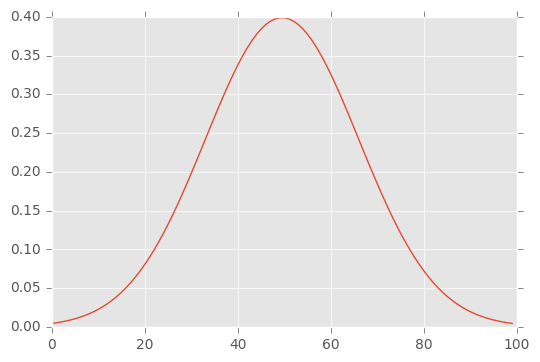

In [90]:
res = z.eval()
plt.plot(res)
# if nothing is drawn, and you are using ipython notebook, uncomment the next two lines:
#%matplotlib inline
#plt.plot(res)

<a name="convolution"></a>
# Convolution

<a name="creating-a-2-d-gaussian-kernel"></a>
## Creating a 2-D Gaussian Kernel

Let's try creating a 2-dimensional Gaussian.  This can be done by multiplying a vector by its transpose.  If you aren't familiar with matrix math, I'll review a few important concepts.  This is about 98% of what neural networks do so if you're unfamiliar with this, then please stick with me through this and it'll be smooth sailing.  First, to multiply two matrices, their inner dimensions must agree, and the resulting matrix will have the shape of the outer dimensions.

So let's say we have two matrices, X and Y.  In order for us to multiply them, X's columns must match Y's rows.  I try to remember it like so:
<pre>
    (X_rows, X_cols) x (Y_rows, Y_cols)
      |       |           |      |
      |       |___________|      |
      |             ^            |
      |     inner dimensions     |
      |        must match        |
      |                          |
      |__________________________|
                    ^
           resulting dimensions
         of matrix multiplication
</pre>
But our matrix is actually a vector, or a 1 dimensional matrix.  That means its dimensions are N x 1.  So to multiply them, we'd have:
<pre>
     (N,      1)    x    (1,     N)
      |       |           |      |
      |       |___________|      |
      |             ^            |
      |     inner dimensions     |
      |        must match        |
      |                          |
      |__________________________|
                    ^
           resulting dimensions
         of matrix multiplication
</pre>

In [94]:
tf.reshape(z, [ksize, 1])

<tf.Tensor 'Reshape_16:0' shape=(100, 1) dtype=float32>

100


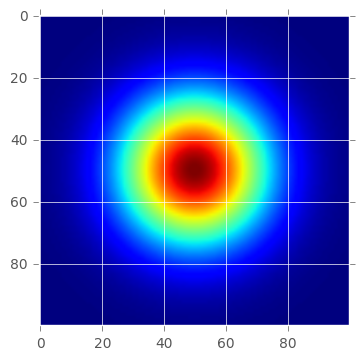

In [91]:
# Let's store the number of values in our Gaussian curve.
ksize = z.get_shape().as_list()[0]
print(ksize)

# Let's multiply the two to get a 2d gaussian
z_2d = tf.matmul(tf.reshape(z, [ksize, 1]), tf.reshape(z, [1, ksize]))

# Execute the graph
plt.imshow(z_2d.eval())

<a name="convolving-an-image-with-a-gaussian"></a>
## Convolving an Image with a Gaussian

A very common operation that we'll come across with Deep Learning is convolution.  We're going to explore what this means using our new gaussian kernel that we've just created.  For now, just think of it a way of filtering information.  We're going to effectively filter our image using this Gaussian function, as if the gaussian function is the lens through which we'll see our image data.  What it will do is at every location we tell it to filter, it will average the image values around it based on what the kernel's values are.  The Gaussian's kernel is basically saying, take a lot the center, a then decesasingly less as you go farther away from the center.  The effect of convolving the image with this type of kernel is that the entire image will be blurred.  If you would like an interactive exploratin of convolution, this website is great:

http://setosa.io/ev/image-kernels/

(512, 512)


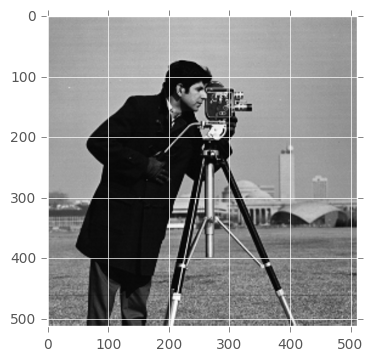

In [38]:
# Let's first load an image.  We're going to need a grayscale image to begin with.  skimage has some images we can play with.  If you do not have the skimage module, you can load your own image, or get skimage by pip installing "scikit-image".
from skimage import data
img = data.camera().astype(np.float32)
plt.imshow(img, cmap='gray')
print(img.shape)

Notice our img shape is 2-dimensional.  For image convolution in Tensorflow, we need our images to be 4 dimensional.  Remember that when we load many iamges and combine them in a single numpy array, the resulting shape has the number of images first.

N x H x W x C

In order to perform 2d convolution with tensorflow, we'll need the same dimensions for our image.  With just 1 grayscale image, this means the shape will be:

1 x H x W x 1

In [39]:
# We could use the numpy reshape function to reshape our numpy array
img_4d = img.reshape([1, img.shape[0], img.shape[1], 1])
print(img_4d.shape)

# but since we'll be using tensorflow, we can use the tensorflow reshape function:
img_4d = tf.reshape(img, [1, img.shape[0], img.shape[1], 1])
print(img_4d)

(1, 512, 512, 1)
Tensor("Reshape_7:0", shape=(1, 512, 512, 1), dtype=float32)


Instead of getting a numpy array back, we get a tensorflow tensor.  This means we can't access the `shape` parameter like we did with the numpy array.  But instead, we can use `get_shape()`, and `get_shape().as_list()`:

In [40]:
print(img_4d.get_shape())
print(img_4d.get_shape().as_list())

(1, 512, 512, 1)
[1, 512, 512, 1]


The H x W image is now part of a 4 dimensional array, where the other dimensions of N and C are 1.  So there is only 1 image and only 1 channel.

We'll also have to reshape our Gaussian Kernel to be 4-dimensional as well.  The dimensions for kernels are slightly different!  Remember that the image is:

Number of Images x Image Height x Image Width x Number of Channels

we have:

Kernel Height x Kernel Width x Number of Input Channels x Number of Output Channels

Our Kernel already has a height and width of `ksize` so we'll stick with that for now.  The number of input channels should match the number of channels on the image we want to convolve.  And for now, we just keep the same number of output channels as the input channels, but we'll later see how this comes into play.

In [41]:
# Reshape the 2d kernel to tensorflow's required 4d format: H x W x I x O
z_4d = tf.reshape(z_2d, [ksize, ksize, 1, 1])
print(z_4d.get_shape().as_list())

[100, 100, 1, 1]


<a name="convolvefilter-an-image-using-a-gaussian-kernel"></a>
## Convolve/Filter an image using a Gaussian Kernel

We can now use our previous Gaussian Kernel to convolve our image:

In [33]:
convolved = tf.nn.conv2d(img_4d, z_4d, strides=[1, 1, 1, 1], padding='SAME')
res = convolved.eval()
print(res.shape)

(1, 512, 512, 1)


There are two new parameters here: `strides`, and `padding`.  Strides says how to move our kernel across the image.  Basically, we'll only ever use it for one of two sets of parameters:

[1, 1, 1, 1], which means, we are going to convolve every single image, every pixel, and every color channel by whatever the kernel is.

and the second option:

[1, 2, 2, 1], which means, we are going to convolve every single image, but every other pixel, in every single color channel.

Padding says what to do at the borders.  If we say "SAME", that means we want the same dimensions going in as we do going out.  In order to do this, zeros must be padded around the image.  If we say "VALID", that means no padding is used, and the image dimensions will actually change.

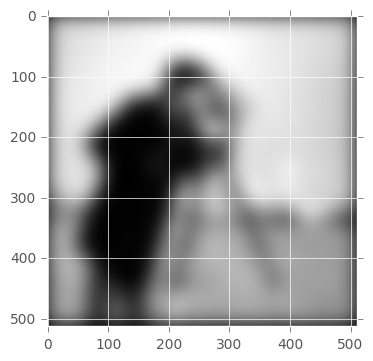

In [35]:
# Matplotlib cannot handle plotting 4D images!  We'll have to convert this back to the original shape.  There are a few ways we could do this.  We could plot by "squeezing" the singleton dimensions.
plt.imshow(np.squeeze(res), cmap='gray')

# Or we could specify the exact dimensions we want to visualize:
plt.imshow(res[0, :, :, 0], cmap='gray')

<a name="modulating-the-gaussian-with-a-sine-wave-to-create-gabor-kernel"></a>
## Modulating the Gaussian with a Sine Wave to create Gabor Kernel

We've now seen how to use tensorflow to create a set of operations which create a 2-dimensional Gaussian kernel, and how to use that kernel to filter or convolve another image.  Let's create another interesting convolution kernel called a Gabor.  This is a lot like the Gaussian kernel, except we use a sine wave to modulate that.

<graphic: draw 1d gaussian wave, 1d sine, show modulation as multiplication and resulting gabor.>

We first use linspace to get a set of values the same range as our gaussian, which should be from -3 standard deviations to +3 standard deviations.

In [42]:
xs = tf.linspace(-3.0, 3.0, ksize)

We then calculate the sine of these values, which should give us a nice wave

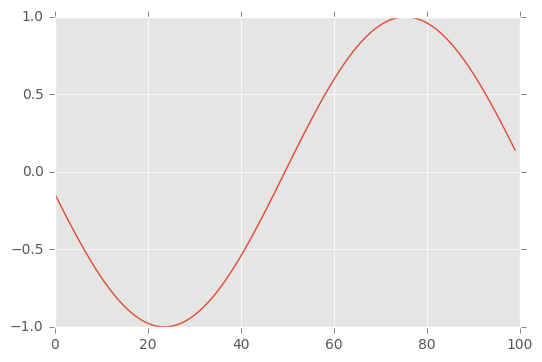

In [43]:
ys = tf.sin(xs)
plt.figure()
plt.plot(ys.eval())

And for multiplication, we'll need to convert this 1-dimensional vector to a matrix: N x 1

In [44]:
ys = tf.reshape(ys, [ksize, 1])

We then repeat this wave across the matrix by using a multiplication of ones:

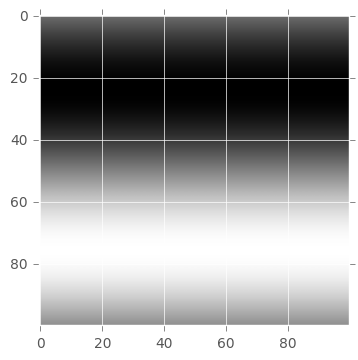

In [45]:
ones = tf.ones((1, ksize))
wave = tf.matmul(ys, ones)
plt.imshow(wave.eval(), cmap='gray')

We can directly multiply our old Gaussian kernel by this wave and get a gabor kernel:

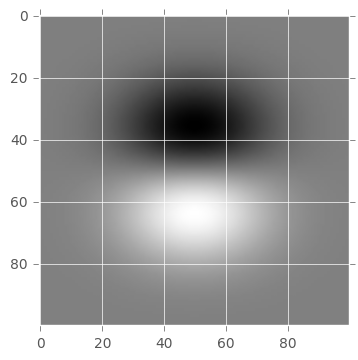

In [46]:
gabor = tf.mul(wave, z_2d)
plt.imshow(gabor.eval(), cmap='gray')

<a name="manipulating-an-image-with-this-gabor"></a>
## Manipulating an image with this Gabor

We've already gone through the work of convolving an image.  The only thing that has changed is the kernel that we want to convolve with.  We could have made life easier by specifying in our graph which elements we wanted to be specified later.  Tensorflow calls these "placeholders", meaning, we're not sure what these are yet, but we know they'll fit in the graph like so, generally the input and output of the network.

Let's rewrite our convolution operation using a placeholder for the image and the kernel and then see how the same operation could have been done.  We're going to set the image dimensions to `None` x `None`.  This is something special for placeholders which tells tensorflow "let this dimension be any possible value".  1, 5, 100, 1000, it doesn't matter.

In [47]:
# This is a placeholder which will become part of the tensorflow graph, but
# which we have to later explicitly define whenever we run/evaluate the graph.
# Pretty much everything you do in tensorflow can have a name.  If we don't
# specify the name, tensorflow will give a default one, like "Placeholder_0".
# Let's use a more useful name to help us understand what's happening.
img = tf.placeholder(tf.float32, shape=[None, None], name='img')


# We'll reshape the 2d image to a 3-d tensor just like before:
# Except now we'll make use of another tensorflow function, expand dims, which adds a singleton dimension at the axis we specify.
# We use it to reshape our H x W image to include a channel dimension of 1
# our new dimensions will end up being: H x W x 1
img_3d = tf.expand_dims(img, 2)
dims = img_3d.get_shape()
print(dims)

# And again to get: 1 x H x W x 1
img_4d = tf.expand_dims(img_3d, 0)
print(img_4d.get_shape().as_list())

# Let's create another set of placeholders for our Gabor's parameters:
mean = tf.placeholder(tf.float32, name='mean')
sigma = tf.placeholder(tf.float32, name='sigma')
ksize = tf.placeholder(tf.int32, name='ksize')

# Then finally redo the entire set of operations we've done to convolve our
# image, except with our placeholders
x = tf.linspace(-3.0, 3.0, ksize)
z = (tf.exp(tf.neg(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
      (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
z_2d = tf.matmul(
  tf.reshape(z, tf.pack([ksize, 1])),
  tf.reshape(z, tf.pack([1, ksize])))
ys = tf.sin(x)
ys = tf.reshape(ys, tf.pack([ksize, 1]))
ones = tf.ones(tf.pack([1, ksize]))
wave = tf.matmul(ys, ones)
gabor = tf.mul(wave, z_2d)
gabor_4d = tf.reshape(gabor, tf.pack([ksize, ksize, 1, 1]))

# And finally, convolve the two:
convolved = tf.nn.conv2d(img_4d, gabor_4d, strides=[1, 1, 1, 1], padding='SAME', name='convolved')
convolved_img = convolved[0, :, :, 0]

(?, ?, 1)
[1, None, None, 1]


What we've done is create an entire graph from our placeholders which is capable of convolving an image with a gabor kernel.  In order to compute it, we have to specify all of the placeholders required for its computation.

If we try to evaluate it without specifying placeholders beforehand, we will get an error `InvalidArgumentError: You must feed a value for placeholder tensor 'img' with dtype float and shape [512,512]`:

In [48]:
convolved_img.eval()

InvalidArgumentError: You must feed a value for placeholder tensor 'ksize' with dtype int32
	 [[Node: ksize = Placeholder[dtype=DT_INT32, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
Caused by op 'ksize', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/cck197/CADL/venv/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/cck197/CADL/venv/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/cck197/CADL/venv/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/cck197/CADL/venv/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/cck197/CADL/venv/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/cck197/CADL/venv/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/cck197/CADL/venv/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/cck197/CADL/venv/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/cck197/CADL/venv/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/cck197/CADL/venv/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/cck197/CADL/venv/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/cck197/CADL/venv/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/cck197/CADL/venv/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/cck197/CADL/venv/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/cck197/CADL/venv/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/cck197/CADL/venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/cck197/CADL/venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/cck197/CADL/venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-47-4eb6dd4e6c0d>", line 24, in <module>
    ksize = tf.placeholder(tf.int32, name='ksize')
  File "/home/cck197/CADL/venv/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 895, in placeholder
    name=name)
  File "/home/cck197/CADL/venv/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1238, in _placeholder
    name=name)
  File "/home/cck197/CADL/venv/lib/python3.5/site-packages/tensorflow/python/ops/op_def_library.py", line 704, in apply_op
    op_def=op_def)
  File "/home/cck197/CADL/venv/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2260, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/cck197/CADL/venv/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1230, in __init__
    self._traceback = _extract_stack()


It's saying that we didn't specify our placeholder for `img`.  In order to "feed a value", we use the `feed_dict` parameter like so:

In [47]:
convolved_img.eval(feed_dict={img: data.camera()})

InvalidArgumentError: You must feed a value for placeholder tensor 'ksize' with dtype int32
	 [[Node: ksize = Placeholder[dtype=DT_INT32, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
Caused by op 'ksize', defined at:
  File "/Users/pkmital/.pyenv/versions/3.4.0/Python.framework/Versions/3.4/lib/python3.4/runpy.py", line 171, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/pkmital/.pyenv/versions/3.4.0/Python.framework/Versions/3.4/lib/python3.4/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/pkmital/.pyenv/versions/3.4.0/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/pkmital/.pyenv/versions/3.4.0/Python.framework/Versions/3.4/lib/python3.4/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/Users/pkmital/.pyenv/versions/3.4.0/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/kernelapp.py", line 442, in start
    ioloop.IOLoop.instance().start()
  File "/Users/pkmital/.pyenv/versions/3.4.0/Python.framework/Versions/3.4/lib/python3.4/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/Users/pkmital/.pyenv/versions/3.4.0/Python.framework/Versions/3.4/lib/python3.4/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/Users/pkmital/.pyenv/versions/3.4.0/Python.framework/Versions/3.4/lib/python3.4/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/pkmital/.pyenv/versions/3.4.0/Python.framework/Versions/3.4/lib/python3.4/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/pkmital/.pyenv/versions/3.4.0/Python.framework/Versions/3.4/lib/python3.4/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/pkmital/.pyenv/versions/3.4.0/Python.framework/Versions/3.4/lib/python3.4/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/pkmital/.pyenv/versions/3.4.0/Python.framework/Versions/3.4/lib/python3.4/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/pkmital/.pyenv/versions/3.4.0/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/pkmital/.pyenv/versions/3.4.0/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/pkmital/.pyenv/versions/3.4.0/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/kernelbase.py", line 391, in execute_request
    user_expressions, allow_stdin)
  File "/Users/pkmital/.pyenv/versions/3.4.0/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/ipkernel.py", line 199, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/pkmital/.pyenv/versions/3.4.0/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 2705, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/pkmital/.pyenv/versions/3.4.0/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 2809, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/pkmital/.pyenv/versions/3.4.0/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 2869, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-45-4eb6dd4e6c0d>", line 24, in <module>
    ksize = tf.placeholder(tf.int32, name='ksize')
  File "/Users/pkmital/.pyenv/versions/3.4.0/Python.framework/Versions/3.4/lib/python3.4/site-packages/tensorflow/python/ops/array_ops.py", line 895, in placeholder
    name=name)
  File "/Users/pkmital/.pyenv/versions/3.4.0/Python.framework/Versions/3.4/lib/python3.4/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1238, in _placeholder
    name=name)
  File "/Users/pkmital/.pyenv/versions/3.4.0/Python.framework/Versions/3.4/lib/python3.4/site-packages/tensorflow/python/ops/op_def_library.py", line 704, in apply_op
    op_def=op_def)
  File "/Users/pkmital/.pyenv/versions/3.4.0/Python.framework/Versions/3.4/lib/python3.4/site-packages/tensorflow/python/framework/ops.py", line 2260, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/pkmital/.pyenv/versions/3.4.0/Python.framework/Versions/3.4/lib/python3.4/site-packages/tensorflow/python/framework/ops.py", line 1230, in __init__
    self._traceback = _extract_stack()


But that's not the only placeholder in our graph!  We also have placeholders for `mean`, `sigma`, and `ksize`.  Once we specify all of them, we'll have our result:

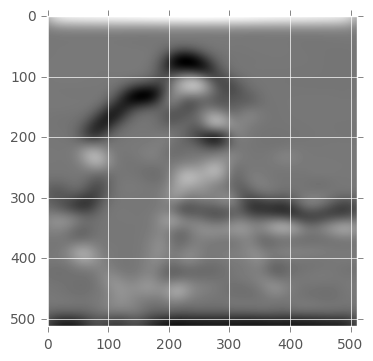

In [49]:
res = convolved_img.eval(feed_dict={
    img: data.camera(), mean:0.0, sigma:1.0, ksize:100})
plt.imshow(res, cmap='gray')

Now, instead of having to rewrite the entire graph, we can just specify the different placeholders.

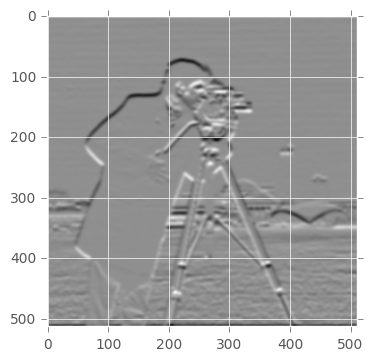

In [50]:
res = convolved_img.eval(feed_dict={
    img: data.camera(),
    mean: 0.0,
    sigma: 0.5,
    ksize: 32
  })
plt.imshow(res, cmap='gray')

<a name="homework"></a>
# Homework

For your first assignment, we'll work on creating our own dataset.  You'll need to find at least 100 images and work through the [notebook](session-1.ipynb).

<a name="next-session"></a>
# Next Session

In the next session, we'll create our first Neural Network and see how it can be used to paint an image.

<a name="reading-material"></a>
# Reading Material

Abadi, M., Agarwal, A., Barham, P., Brevdo, E., Chen, Z., Citro, C., … Zheng, X. (2015). TensorFlow : Large-Scale Machine Learning on Heterogeneous Distributed Systems.
https://arxiv.org/abs/1603.04467

Yoshua Bengio, Aaron Courville, Pascal Vincent.  Representation Learning: A Review and New Perspectives.  24 Jun 2012.
https://arxiv.org/abs/1206.5538

J. Schmidhuber. Deep Learning in Neural Networks: An Overview. Neural Networks, 61, p 85-117, 2015.
https://arxiv.org/abs/1404.7828

LeCun, Yann, Yoshua Bengio, and Geoffrey Hinton. “Deep learning.” Nature 521, no. 7553 (2015): 436-444.

Ian Goodfellow Yoshua Bengio and Aaron Courville.  Deep Learning.  2016.
http://www.deeplearningbook.org/